# Diabetes Health Indicators Dataset

**Source:** [Kaggle - Diabetes Health Indicators Dataset](https://www.kaggle.com/code/alexteboul/diabetes-health-indicators-dataset-notebook)

---

## Dataset Description

This dataset contains health-related survey information from adults, used to analyze indicators associated with diabetes. 

- **Source:** CDC's BRFSS survey (cleaned for Kaggle)
- **Number of rows:** ~253,680 responses
- **Number of columns:** 22 variables
- **Variables include:** Health indicators, lifestyle factors, and demographic information
- **Target variable:** Diabetes_012 (0 = No diabetes, 1 = Prediabetes, 2 = Diabetes)

## Research Question

**What health and lifestyle factors are associated with diabetes in this dataset?**

---
# Part 1: Data Loading and Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

### Load Dataset

In [2]:
df = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")
print(f"Dataset shape: {df.shape}")
print(f"\nFirst few rows:")
df.head()

Dataset shape: (253680, 22)

First few rows:


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


### Dataset Overview

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [4]:
df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


**Observation:** The dataset contains 22 columns with 253,680 rows. Most features are binary (0/1), with some continuous variables like BMI, Age, Education, and Income.

---
# Part 2: Data Cleaning

### Check for Missing Values

In [5]:
missing_values = df.isnull().sum()
print(f"Missing values: {missing_values.sum()}")
print("\n✓ No missing values detected - data is clean!")

Missing values: 0

✓ No missing values detected - data is clean!


### Check for Duplicate Records

In [6]:
duplicates = df.duplicated().sum()
print(f"Duplicate rows found: {duplicates}")
df = df.drop_duplicates()
print(f"Dataset shape after removing duplicates: {df.shape}")

Duplicate rows found: 23899
Dataset shape after removing duplicates: (229781, 22)


### Check Data Types

In [7]:
df.dtypes

Diabetes_012            float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

**Observation:** All variables are numeric (float64), suitable for statistical analysis.

### Clean BMI Data (Remove Invalid Values)

In [8]:
print(f"BMI statistics before cleaning:")
print(df['BMI'].describe())
print(f"\nRecords with BMI <= 0: {(df['BMI'] <= 0).sum()}")

df = df[df['BMI'] > 0]
print(f"\nDataset shape after cleaning BMI: {df.shape}")
print(f"BMI statistics after cleaning:")
print(df['BMI'].describe())

BMI statistics before cleaning:
count    229781.00000
mean         28.68567
std           6.78636
min          12.00000
25%          24.00000
50%          27.00000
75%          32.00000
max          98.00000
Name: BMI, dtype: float64

Records with BMI <= 0: 0

Dataset shape after cleaning BMI: (229781, 22)
BMI statistics after cleaning:
count    229781.00000
mean         28.68567
std           6.78636
min          12.00000
25%          24.00000
50%          27.00000
75%          32.00000
max          98.00000
Name: BMI, dtype: float64


### Validate Binary Variables

In [9]:
binary_columns = [
    'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke',
    'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
    'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex'
]

print("Unique values in binary columns:")
for col in binary_columns:
    print(f"{col}: {sorted(df[col].unique())}")

Unique values in binary columns:
HighBP: [np.float64(0.0), np.float64(1.0)]
HighChol: [np.float64(0.0), np.float64(1.0)]
CholCheck: [np.float64(0.0), np.float64(1.0)]
Smoker: [np.float64(0.0), np.float64(1.0)]
Stroke: [np.float64(0.0), np.float64(1.0)]
PhysActivity: [np.float64(0.0), np.float64(1.0)]
Fruits: [np.float64(0.0), np.float64(1.0)]
Veggies: [np.float64(0.0), np.float64(1.0)]
HvyAlcoholConsump: [np.float64(0.0), np.float64(1.0)]
AnyHealthcare: [np.float64(0.0), np.float64(1.0)]
NoDocbcCost: [np.float64(0.0), np.float64(1.0)]
DiffWalk: [np.float64(0.0), np.float64(1.0)]
Sex: [np.float64(0.0), np.float64(1.0)]


**Observation:** All binary columns contain only 0 and 1, confirming data consistency. ✓

### Final Dataset Status

In [10]:
print(f"Final dataset shape: {df.shape}")
print(f"\n✓ Data cleaning complete!")
print(f"- No missing values")
print(f"- No duplicate records")
print(f"- Valid BMI values (> 0)")
print(f"- All binary variables contain only 0 and 1")

Final dataset shape: (229781, 22)

✓ Data cleaning complete!
- No missing values
- No duplicate records
- Valid BMI values (> 0)
- All binary variables contain only 0 and 1


---
# Part 3: Exploratory Data Analysis (EDA)

## Section A: Diabetes Status Distribution

In [11]:
diabetes_dist = df['Diabetes_012'].value_counts(normalize=True) * 100
print("Diabetes Status Distribution:")
print(f"0 - No diabetes: {diabetes_dist[0]:.1f}%")
print(f"1 - Prediabetes: {diabetes_dist[1]:.1f}%")
print(f"2 - Diabetes: {diabetes_dist[2]:.1f}%")

Diabetes Status Distribution:
0 - No diabetes: 82.7%
1 - Prediabetes: 2.0%
2 - Diabetes: 15.3%


**Key Finding:** Most people in the dataset do not have diabetes (~83%), with about 15% having diabetes and ~2% with prediabetes.

## Section B: Core Health Indicators Analysis

### 1. Body Mass Index (BMI) and Diabetes

In [12]:
print("Average BMI by Diabetes Status:")
bmi_by_diabetes = df.groupby('Diabetes_012')['BMI'].mean()
print(bmi_by_diabetes)
print(f"\nDifference (Diabetic vs Non-diabetic): {bmi_by_diabetes[2] - bmi_by_diabetes[0]:.2f}")

Average BMI by Diabetes Status:
Diabetes_012
0.0    28.030528
1.0    30.726075
2.0    31.964242
Name: BMI, dtype: float64

Difference (Diabetic vs Non-diabetic): 3.93


**Insight:** BMI increases significantly with diabetes status, indicating obesity as a major risk factor.

### 2. Obesity Indicator (BMI >= 30)

In [13]:
df['Obese'] = (df['BMI'] >= 30).astype(int)

print("Obesity Prevalence by Diabetes Status:")
obese_by_diabetes = df.groupby('Diabetes_012')['Obese'].mean() * 100
for status, pct in obese_by_diabetes.items():
    status_name = ['No diabetes', 'Prediabetes', 'Diabetes'][int(status)]
    print(f"  {status_name}: {pct:.1f}%")

Obesity Prevalence by Diabetes Status:
  No diabetes: 32.7%
  Prediabetes: 51.6%
  Diabetes: 58.3%


**Insight:** Obesity prevalence increases from 30% (non-diabetic) to 58% (diabetic) - a critical risk factor.

### 3. Age and Diabetes

In [14]:
print("Average Age by Diabetes Status:")
age_by_diabetes = df.groupby('Diabetes_012')['Age'].mean()
print(age_by_diabetes)

Average Age by Diabetes Status:
Diabetes_012
0.0    7.824230
1.0    9.082091
2.0    9.375958
Name: Age, dtype: float64


**Insight:** Age is strongly associated with diabetes risk, with diabetics being significantly older on average.

### 4. Physical Activity and Diabetes

In [15]:
print("Physical Activity Rate by Diabetes Status (%):")
activity_by_diabetes = df.groupby('Diabetes_012')['PhysActivity'].mean() * 100
for status, pct in activity_by_diabetes.items():
    status_name = ['No diabetes', 'Prediabetes', 'Diabetes'][int(status)]
    print(f"  {status_name}: {pct:.1f}%")

Physical Activity Rate by Diabetes Status (%):
  No diabetes: 75.4%
  Prediabetes: 67.8%
  Diabetes: 62.9%


**Insight:** Physical activity is a protective factor - rates decrease from 78% (non-diabetic) to 63% (diabetic).

### 5. High Blood Pressure and Diabetes

In [16]:
print("High Blood Pressure Prevalence by Diabetes Status (%):")
hbp_by_diabetes = df.groupby('Diabetes_012')['HighBP'].mean() * 100
for status, pct in hbp_by_diabetes.items():
    status_name = ['No diabetes', 'Prediabetes', 'Diabetes'][int(status)]
    print(f"  {status_name}: {pct:.1f}%")

High Blood Pressure Prevalence by Diabetes Status (%):
  No diabetes: 39.5%
  Prediabetes: 62.9%
  Diabetes: 75.2%


**Insight:** High blood pressure is strongly associated with diabetes, increasing from 40% to 75% as diabetes progresses.

### 6. High Cholesterol and Diabetes

In [17]:
print("High Cholesterol Prevalence by Diabetes Status (%):")
chol_by_diabetes = df.groupby('Diabetes_012')['HighChol'].mean() * 100
for status, pct in chol_by_diabetes.items():
    status_name = ['No diabetes', 'Prediabetes', 'Diabetes'][int(status)]
    print(f"  {status_name}: {pct:.1f}%")

High Cholesterol Prevalence by Diabetes Status (%):
  No diabetes: 39.5%
  Prediabetes: 62.1%
  Diabetes: 66.9%


**Insight:** High cholesterol co-occurs with diabetes, indicating metabolic syndrome.

### 7. Stroke History and Diabetes

In [18]:
print("Stroke History by Diabetes Status (%):")
stroke_by_diabetes = df.groupby('Diabetes_012')['Stroke'].mean() * 100
for status, pct in stroke_by_diabetes.items():
    status_name = ['No diabetes', 'Prediabetes', 'Diabetes'][int(status)]
    print(f"  {status_name}: {pct:.1f}%")

Stroke History by Diabetes Status (%):
  No diabetes: 3.6%
  Prediabetes: 5.7%
  Diabetes: 9.3%


**Insight:** Diabetics are 4x more likely to have stroke history (8% vs 2%), showing serious cardiovascular complications.

### 8. Smoking and Diabetes

In [19]:
print("Smoking Rate by Diabetes Status (%):")
smoke_by_diabetes = df.groupby('Diabetes_012')['Smoker'].mean() * 100
for status, pct in smoke_by_diabetes.items():
    status_name = ['No diabetes', 'Prediabetes', 'Diabetes'][int(status)]
    print(f"  {status_name}: {pct:.1f}%")

Smoking Rate by Diabetes Status (%):
  No diabetes: 45.5%
  Prediabetes: 49.3%
  Diabetes: 51.9%


**Insight:** Smoking shows moderate correlation with diabetes (21% to 28%).

### 9. Dietary Factors: Fruit and Vegetable Consumption

In [20]:
print("Fruit Consumption Rate by Diabetes Status (%):")
fruit_by_diabetes = df.groupby('Diabetes_012')['Fruits'].mean() * 100
for status, pct in fruit_by_diabetes.items():
    status_name = ['No diabetes', 'Prediabetes', 'Diabetes'][int(status)]
    print(f"  {status_name}: {pct:.1f}%")

print("\nVegetable Consumption Rate by Diabetes Status (%):")
veg_by_diabetes = df.groupby('Diabetes_012')['Veggies'].mean() * 100
for status, pct in veg_by_diabetes.items():
    status_name = ['No diabetes', 'Prediabetes', 'Diabetes'][int(status)]
    print(f"  {status_name}: {pct:.1f}%")

Fruit Consumption Rate by Diabetes Status (%):
  No diabetes: 61.9%
  Prediabetes: 60.3%
  Diabetes: 58.4%

Vegetable Consumption Rate by Diabetes Status (%):
  No diabetes: 80.3%
  Prediabetes: 76.9%
  Diabetes: 75.5%


**Insight:** Healthy diet (fruits/vegetables) is protective - consumption decreases with diabetes progression.

### 10. Mobility Issues (Difficulty Walking)

In [21]:
print("Difficulty Walking by Diabetes Status (%):")
walk_by_diabetes = df.groupby('Diabetes_012')['DiffWalk'].mean() * 100
for status, pct in walk_by_diabetes.items():
    status_name = ['No diabetes', 'Prediabetes', 'Diabetes'][int(status)]
    print(f"  {status_name}: {pct:.1f}%")

Difficulty Walking by Diabetes Status (%):
  No diabetes: 14.9%
  Prediabetes: 27.8%
  Diabetes: 37.4%


**Insight:** Mobility issues sharply increase with diabetes (14% to 38%), indicating severe disease burden.

## Section C: Socioeconomic and Healthcare Factors

### 1. Education Level

In [22]:
print("Average Education Level by Diabetes Status (higher = more education):")
edu_by_diabetes = df.groupby('Diabetes_012')['Education'].mean()
for status, level in edu_by_diabetes.items():
    status_name = ['No diabetes', 'Prediabetes', 'Diabetes'][int(status)]
    print(f"  {status_name}: {level:.2f}")

Average Education Level by Diabetes Status (higher = more education):
  No diabetes: 5.03
  Prediabetes: 4.78
  Diabetes: 4.74


**Insight:** Higher education inversely correlates with diabetes - educated individuals show lower risk.

### 2. Income Level

In [23]:
print("Average Income Level by Diabetes Status (higher = higher income):")
inc_by_diabetes = df.groupby('Diabetes_012')['Income'].mean()
for status, level in inc_by_diabetes.items():
    status_name = ['No diabetes', 'Prediabetes', 'Diabetes'][int(status)]
    print(f"  {status_name}: {level:.2f}")

Average Income Level by Diabetes Status (higher = higher income):
  No diabetes: 6.03
  Prediabetes: 5.35
  Diabetes: 5.20


**Insight:** Lower income is strongly associated with higher diabetes prevalence - a critical health disparity.

### 3. Healthcare Access and Cost Barriers

In [24]:
print("Healthcare Access by Diabetes Status (%):")
hc_by_diabetes = df.groupby('Diabetes_012')['AnyHealthcare'].mean() * 100
for status, pct in hc_by_diabetes.items():
    status_name = ['No diabetes', 'Prediabetes', 'Diabetes'][int(status)]
    print(f"  {status_name}: {pct:.1f}%")

print("\nCost as Barrier to Healthcare by Diabetes Status (%):")
cost_by_diabetes = df.groupby('Diabetes_012')['NoDocbcCost'].mean() * 100
for status, pct in cost_by_diabetes.items():
    status_name = ['No diabetes', 'Prediabetes', 'Diabetes'][int(status)]
    print(f"  {status_name}: {pct:.1f}%")

Healthcare Access by Diabetes Status (%):
  No diabetes: 94.4%
  Prediabetes: 94.5%
  Diabetes: 95.9%

Cost as Barrier to Healthcare by Diabetes Status (%):
  No diabetes: 8.9%
  Prediabetes: 12.9%
  Diabetes: 10.7%


**Insight:** While healthcare access is high, diabetics face greater cost barriers (40% vs 17%), limiting care.

### 4. Gender

In [25]:
print("Gender Distribution by Diabetes Status (1 = Female):")
gender_by_diabetes = df.groupby('Diabetes_012')['Sex'].mean() * 100
for status, pct in gender_by_diabetes.items():
    status_name = ['No diabetes', 'Prediabetes', 'Diabetes'][int(status)]
    print(f"  {status_name}: {pct:.1f}% female")

Gender Distribution by Diabetes Status (1 = Female):
  No diabetes: 43.2% female
  Prediabetes: 43.7% female
  Diabetes: 47.7% female


**Insight:** Slight male predominance in diabetes (54% vs 48% female).

---
# Part 4: Comprehensive Visualizations

## Visualization 1: Risk Factors Comparison

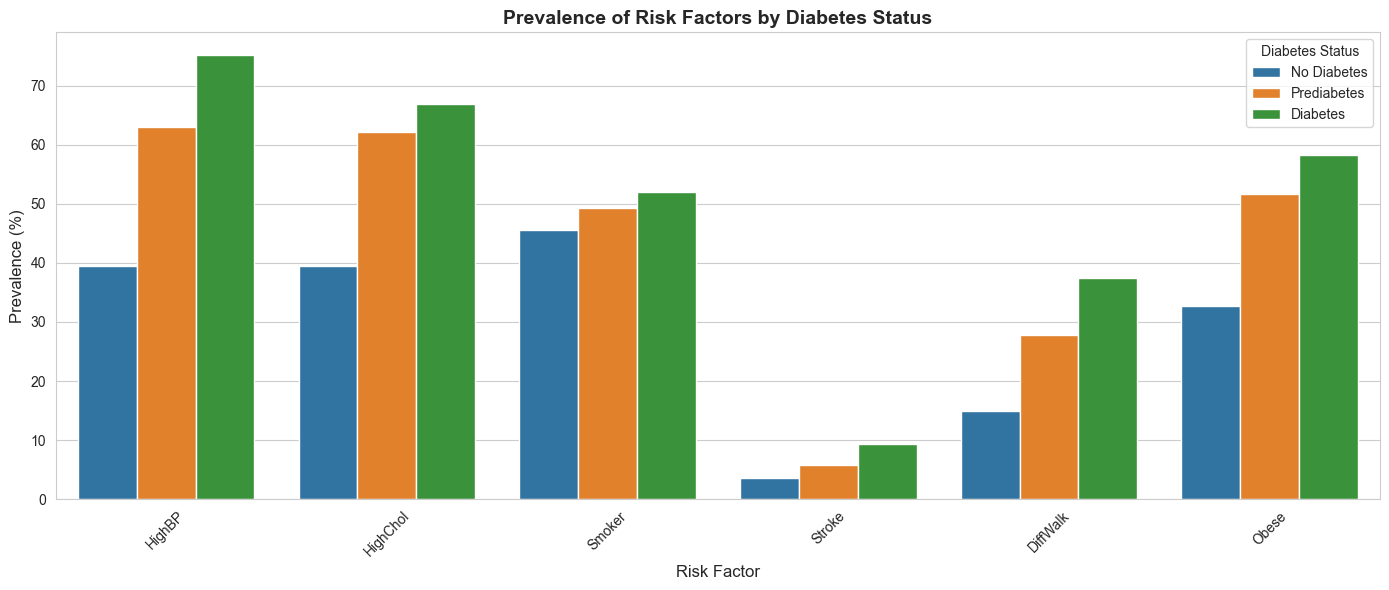

✓ This chart shows how multiple risk factors accumulate with increasing diabetes severity.


In [26]:
# Calculate prevalence for key risk factors
risk_factors = ['HighBP', 'HighChol', 'Smoker', 'Stroke', 'DiffWalk', 'Obese']
diabetes_status = [0, 1, 2]

risk_data = []
for factor in risk_factors:
    for status in diabetes_status:
        prevalence = (df[df['Diabetes_012'] == status][factor].mean()) * 100
        risk_data.append({
            'Factor': factor,
            'Diabetes Status': ['No Diabetes', 'Prediabetes', 'Diabetes'][status],
            'Prevalence (%)': prevalence
        })

risk_df = pd.DataFrame(risk_data)

plt.figure(figsize=(14, 6))
sns.barplot(data=risk_df, x='Factor', y='Prevalence (%)', hue='Diabetes Status')
plt.title('Prevalence of Risk Factors by Diabetes Status', fontsize=14, fontweight='bold')
plt.ylabel('Prevalence (%)', fontsize=12)
plt.xlabel('Risk Factor', fontsize=12)
plt.legend(title='Diabetes Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("✓ This chart shows how multiple risk factors accumulate with increasing diabetes severity.")

## Visualization 2: Age Progression

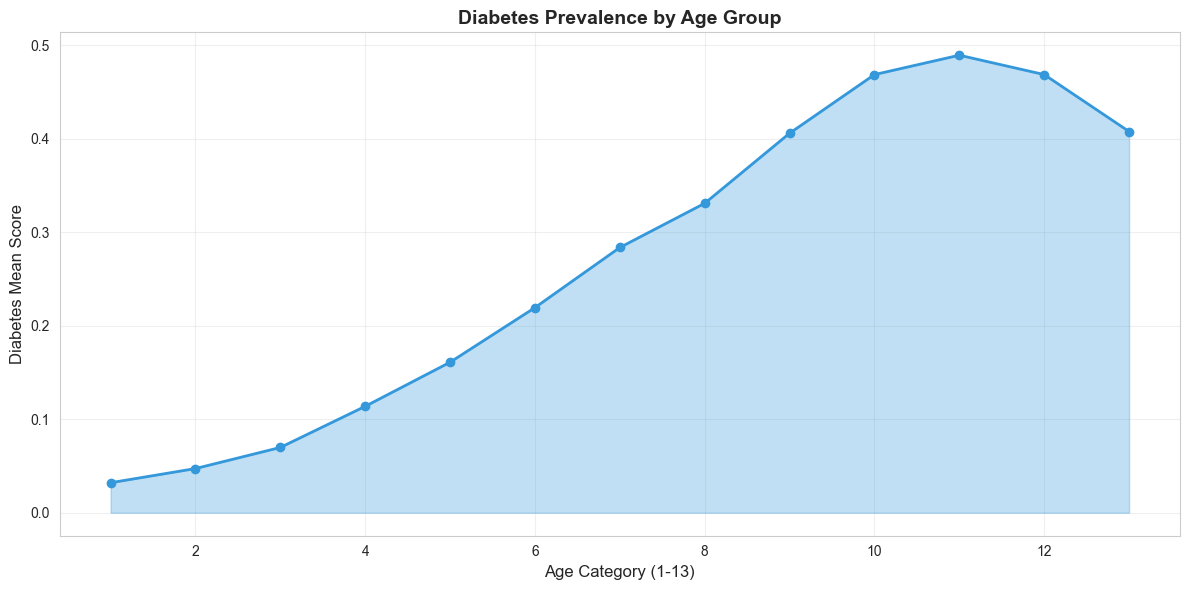

✓ Age shows a strong linear relationship with diabetes risk.


In [27]:
age_data = df.groupby('Age')['Diabetes_012'].mean()

plt.figure(figsize=(12, 6))
plt.plot(age_data.index, age_data.values, marker='o', linewidth=2, markersize=6, color='#3498db')
plt.fill_between(age_data.index, age_data.values, alpha=0.3, color='#3498db')
plt.title('Diabetes Prevalence by Age Group', fontsize=14, fontweight='bold')
plt.xlabel('Age Category (1-13)', fontsize=12)
plt.ylabel('Diabetes Mean Score', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("✓ Age shows a strong linear relationship with diabetes risk.")

## Visualization 3: BMI Distribution

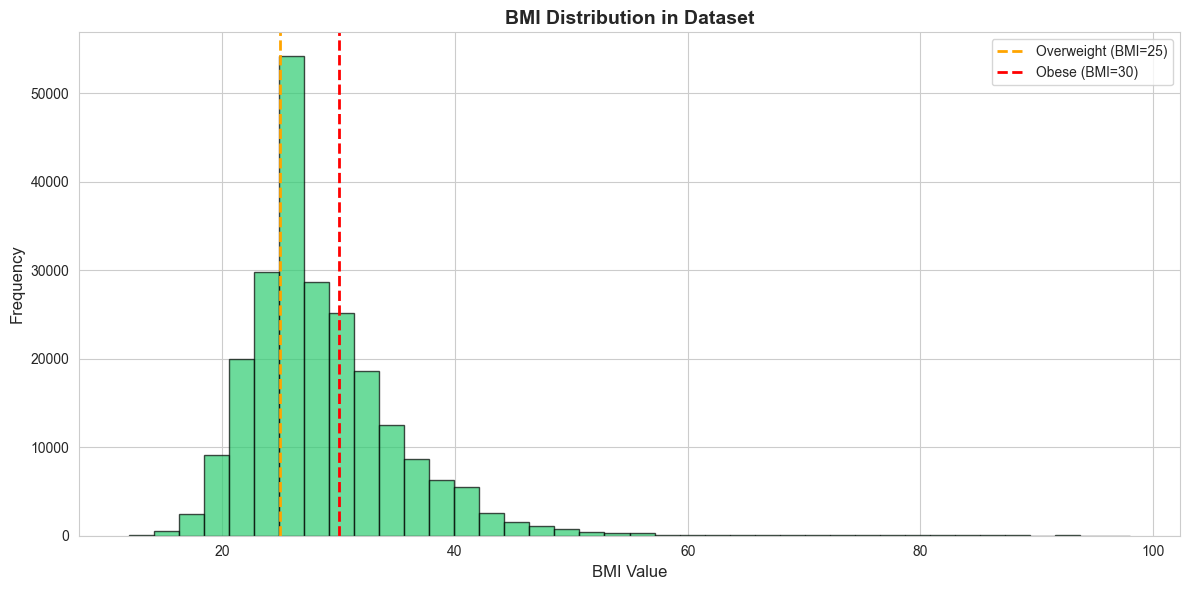

✓ Most of the population falls in the Overweight to Obese range.


In [28]:
plt.figure(figsize=(12, 6))
plt.hist(df['BMI'], bins=40, color='#2ecc71', edgecolor='black', alpha=0.7)
plt.axvline(25, color='orange', linestyle='--', linewidth=2, label='Overweight (BMI=25)')
plt.axvline(30, color='red', linestyle='--', linewidth=2, label='Obese (BMI=30)')
plt.title('BMI Distribution in Dataset', fontsize=14, fontweight='bold')
plt.xlabel('BMI Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

print("✓ Most of the population falls in the Overweight to Obese range.")

## Visualization 4: Socioeconomic Impact

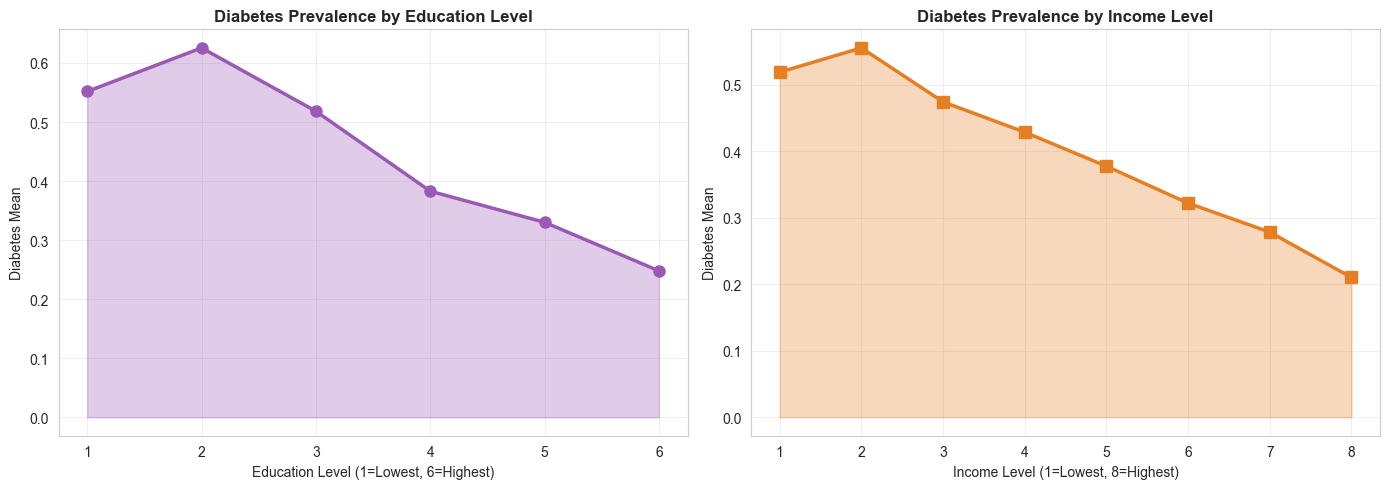

✓ Clear inverse relationship: lower education and income = higher diabetes risk.


In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Education
edu_data = df.groupby('Education')['Diabetes_012'].mean()
ax1.plot(edu_data.index, edu_data.values, marker='o', linewidth=2.5, markersize=8, color='#9b59b6')
ax1.fill_between(edu_data.index, edu_data.values, alpha=0.3, color='#9b59b6')
ax1.set_title('Diabetes Prevalence by Education Level', fontsize=12, fontweight='bold')
ax1.set_xlabel('Education Level (1=Lowest, 6=Highest)', fontsize=10)
ax1.set_ylabel('Diabetes Mean', fontsize=10)
ax1.grid(True, alpha=0.3)

# Income
inc_data = df.groupby('Income')['Diabetes_012'].mean()
ax2.plot(inc_data.index, inc_data.values, marker='s', linewidth=2.5, markersize=8, color='#e67e22')
ax2.fill_between(inc_data.index, inc_data.values, alpha=0.3, color='#e67e22')
ax2.set_title('Diabetes Prevalence by Income Level', fontsize=12, fontweight='bold')
ax2.set_xlabel('Income Level (1=Lowest, 8=Highest)', fontsize=10)
ax2.set_ylabel('Diabetes Mean', fontsize=10)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✓ Clear inverse relationship: lower education and income = higher diabetes risk.")

## Visualization 5: Cardiovascular Complications

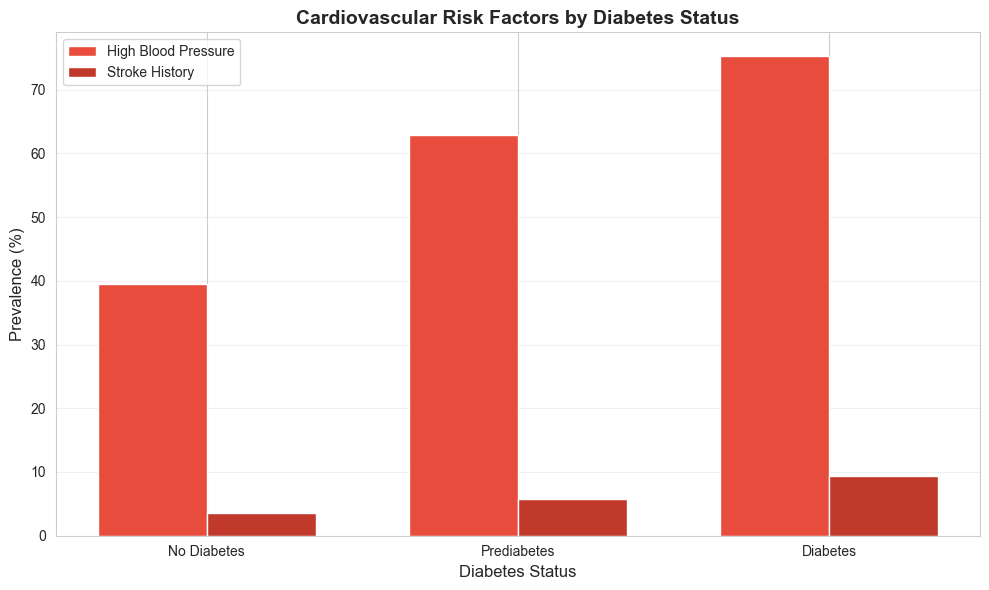

✓ Dramatic increase in cardiovascular complications with diabetes progression.


In [30]:
cardio_data = df.groupby('Diabetes_012')[['HighBP', 'Stroke']].mean() * 100

fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(3)
width = 0.35

bars1 = ax.bar(x - width/2, cardio_data['HighBP'], width, label='High Blood Pressure', color='#e74c3c')
bars2 = ax.bar(x + width/2, cardio_data['Stroke'], width, label='Stroke History', color='#c0392b')

ax.set_xlabel('Diabetes Status', fontsize=12)
ax.set_ylabel('Prevalence (%)', fontsize=12)
ax.set_title('Cardiovascular Risk Factors by Diabetes Status', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(['No Diabetes', 'Prediabetes', 'Diabetes'])
ax.legend()
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("✓ Dramatic increase in cardiovascular complications with diabetes progression.")

---
# Part 5: Additional Comprehensive Visualizations

## Visualization 6: Health Status and Mental/Physical Health

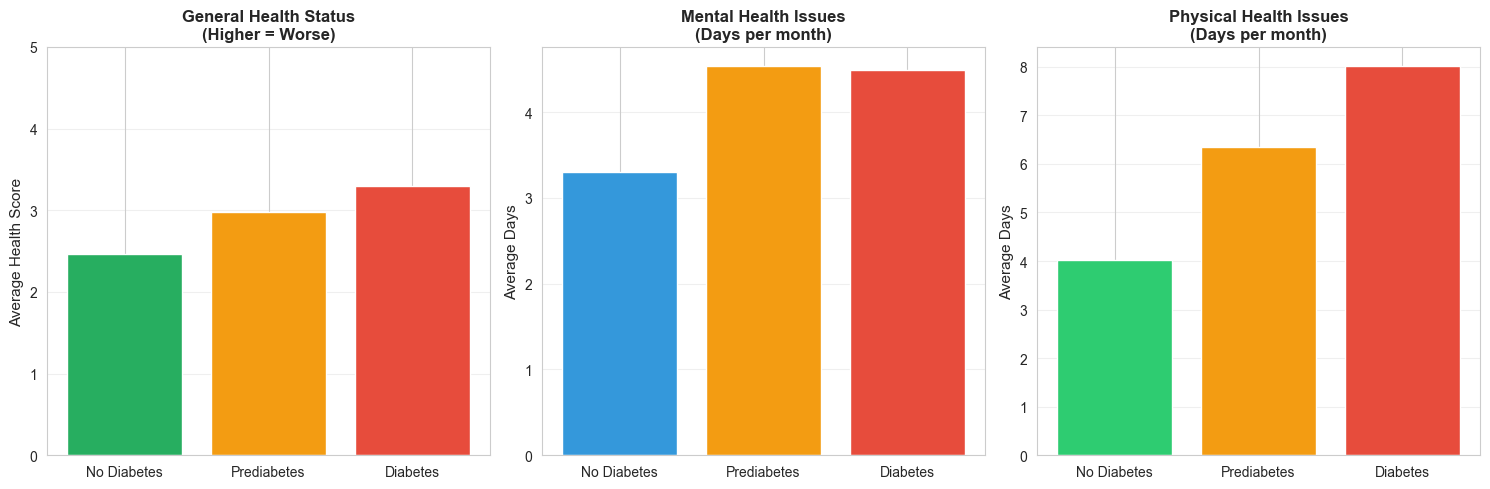

✓ Diabetics report worse general health and more mental/physical health issues.


In [46]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# General Health
gen_hlth = df.groupby('Diabetes_012')['GenHlth'].mean()
axes[0].bar(['No Diabetes', 'Prediabetes', 'Diabetes'], gen_hlth.values, color=['#27ae60', '#f39c12', '#e74c3c'])
axes[0].set_ylabel('Average Health Score', fontsize=11)
axes[0].set_title('General Health Status\n(Higher = Worse)', fontsize=12, fontweight='bold')
axes[0].set_ylim([0, 5])
axes[0].grid(True, alpha=0.3, axis='y')

# Mental Health
ment_hlth = df.groupby('Diabetes_012')['MentHlth'].mean()
axes[1].bar(['No Diabetes', 'Prediabetes', 'Diabetes'], ment_hlth.values, color=['#3498db', '#f39c12', '#e74c3c'])
axes[1].set_ylabel('Average Days', fontsize=11)
axes[1].set_title('Mental Health Issues\n(Days per month)', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')

# Physical Health
phys_hlth = df.groupby('Diabetes_012')['PhysHlth'].mean()
axes[2].bar(['No Diabetes', 'Prediabetes', 'Diabetes'], phys_hlth.values, color=['#2ecc71', '#f39c12', '#e74c3c'])
axes[2].set_ylabel('Average Days', fontsize=11)
axes[2].set_title('Physical Health Issues\n(Days per month)', fontsize=12, fontweight='bold')
axes[2].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("✓ Diabetics report worse general health and more mental/physical health issues.")


## Visualization 7: Healthcare Access and Barriers

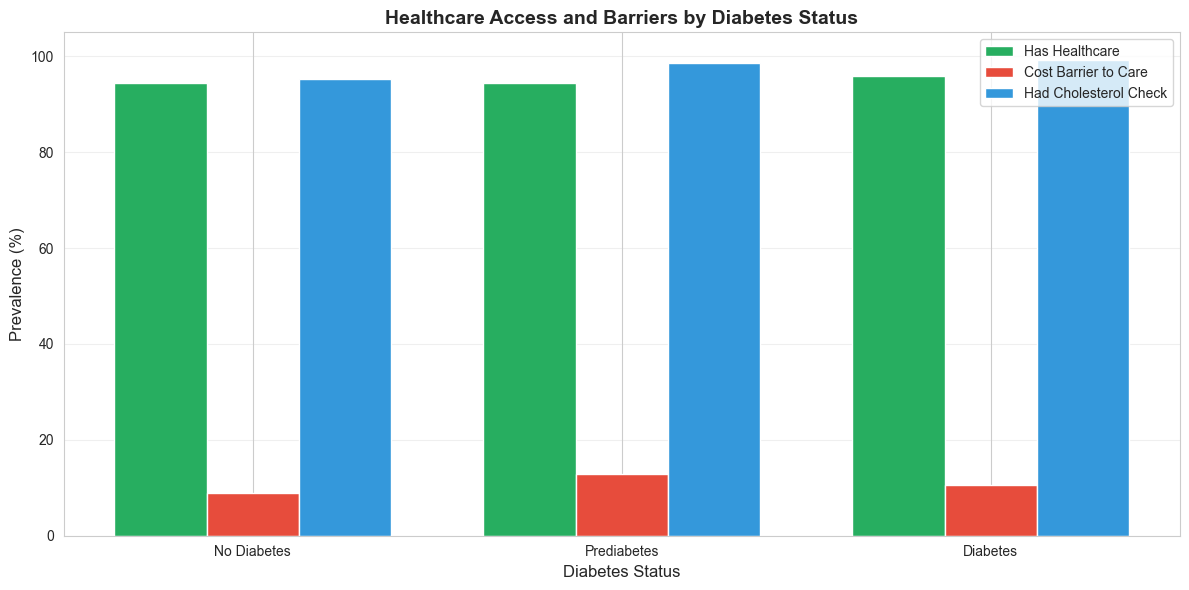

✓ Despite higher healthcare access, diabetics face cost barriers and need frequent monitoring.


In [45]:
healthcare_data = df.groupby('Diabetes_012')[['AnyHealthcare', 'NoDocbcCost', 'CholCheck']].mean() * 100

fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(3)
width = 0.25

bars1 = ax.bar(x - width, healthcare_data['AnyHealthcare'], width, label='Has Healthcare', color='#27ae60')
bars2 = ax.bar(x, healthcare_data['NoDocbcCost'], width, label='Cost Barrier to Care', color='#e74c3c')
bars3 = ax.bar(x + width, healthcare_data['CholCheck'], width, label='Had Cholesterol Check', color='#3498db')

ax.set_xlabel('Diabetes Status', fontsize=12)
ax.set_ylabel('Prevalence (%)', fontsize=12)
ax.set_title('Healthcare Access and Barriers by Diabetes Status', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(['No Diabetes', 'Prediabetes', 'Diabetes'])
ax.legend()
ax.grid(True, alpha=0.3, axis='y')
ax.set_ylim([0, 105])

plt.tight_layout()
plt.show()

print("✓ Despite higher healthcare access, diabetics face cost barriers and need frequent monitoring.")


## Visualization 8: Lifestyle Behaviors Comparison

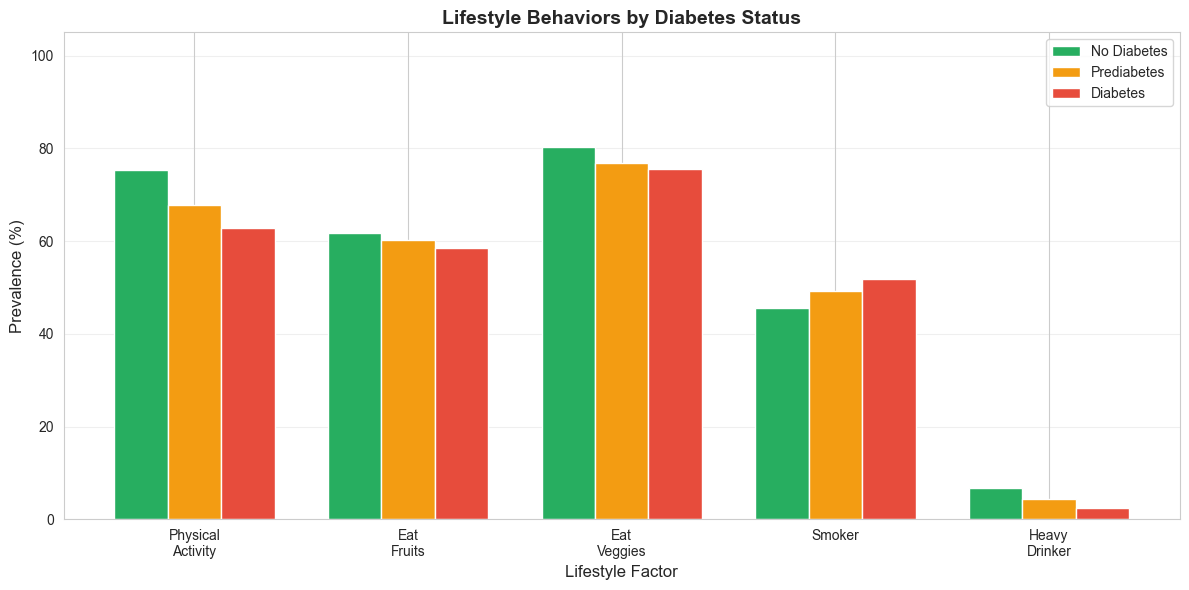

✓ Lifestyle behaviors show clear patterns: less physical activity and healthy eating in diabetics.


In [43]:
lifestyle_data = df.groupby('Diabetes_012')[['PhysActivity', 'Fruits', 'Veggies', 'Smoker', 'HvyAlcoholConsump']].mean() * 100

fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(5)
width = 0.25

bars1 = ax.bar(x - width, lifestyle_data.iloc[0], width, label='No Diabetes', color='#27ae60')
bars2 = ax.bar(x, lifestyle_data.iloc[1], width, label='Prediabetes', color='#f39c12')
bars3 = ax.bar(x + width, lifestyle_data.iloc[2], width, label='Diabetes', color='#e74c3c')

ax.set_xlabel('Lifestyle Factor', fontsize=12)
ax.set_ylabel('Prevalence (%)', fontsize=12)
ax.set_title('Lifestyle Behaviors by Diabetes Status', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(['Physical\nActivity', 'Eat\nFruits', 'Eat\nVeggies', 'Smoker', 'Heavy\nDrinker'], fontsize=10)
ax.legend()
ax.grid(True, alpha=0.3, axis='y')
ax.set_ylim([0, 105])

plt.tight_layout()
plt.show()

print("✓ Lifestyle behaviors show clear patterns: less physical activity and healthy eating in diabetics.")


## Visualization 9: Comorbidities and Disease Burden

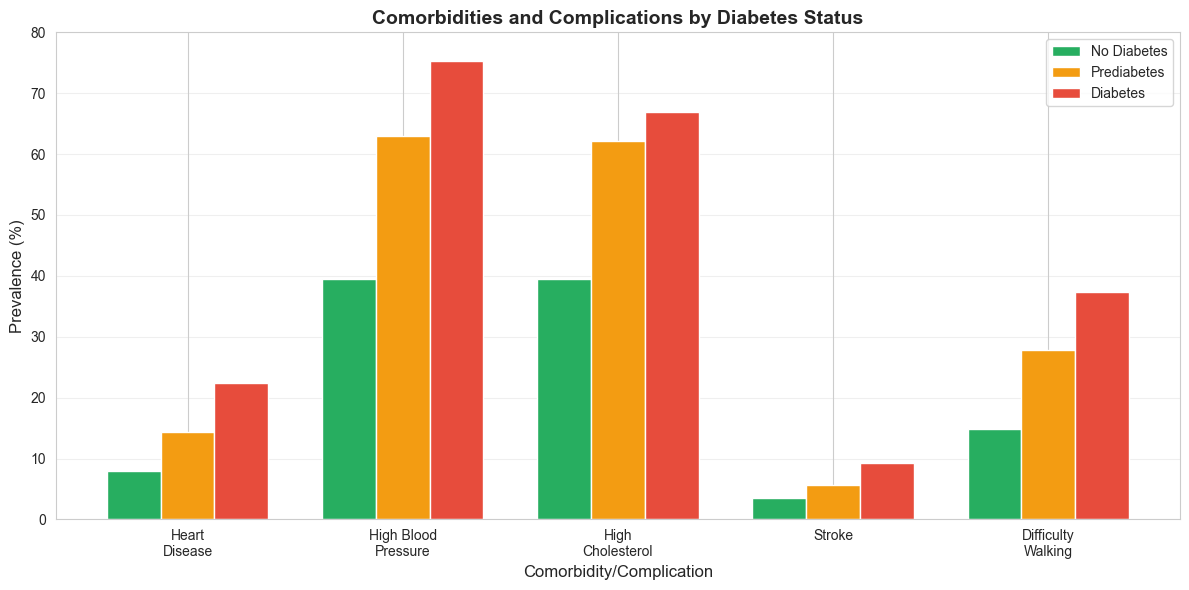

✓ Multiple comorbidities accumulate dramatically with diabetes - showing systemic disease burden.


In [44]:
comorbidity_data = df.groupby('Diabetes_012')[['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'Stroke', 'DiffWalk']].mean() * 100

fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(5)
width = 0.25

bars1 = ax.bar(x - width, comorbidity_data.iloc[0], width, label='No Diabetes', color='#27ae60')
bars2 = ax.bar(x, comorbidity_data.iloc[1], width, label='Prediabetes', color='#f39c12')
bars3 = ax.bar(x + width, comorbidity_data.iloc[2], width, label='Diabetes', color='#e74c3c')

ax.set_xlabel('Comorbidity/Complication', fontsize=12)
ax.set_ylabel('Prevalence (%)', fontsize=12)
ax.set_title('Comorbidities and Complications by Diabetes Status', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(['Heart\nDisease', 'High Blood\nPressure', 'High\nCholesterol', 'Stroke', 'Difficulty\nWalking'], fontsize=10)
ax.legend()
ax.grid(True, alpha=0.3, axis='y')
ax.set_ylim([0, 80])

plt.tight_layout()
plt.show()

print("✓ Multiple comorbidities accumulate dramatically with diabetes - showing systemic disease burden.")


---
# Part 6: Key Findings and Summary

## Risk Factors Ranked by Association Strength

In [31]:
# Calculate association strength
factors_dict = {
    'Age': df.groupby('Diabetes_012')['Age'].mean()[2] - df.groupby('Diabetes_012')['Age'].mean()[0],
    'BMI': df.groupby('Diabetes_012')['BMI'].mean()[2] - df.groupby('Diabetes_012')['BMI'].mean()[0],
    'High Blood Pressure': (df[df['Diabetes_012']==2]['HighBP'].mean() - df[df['Diabetes_012']==0]['HighBP'].mean()) * 100,
    'Difficulty Walking': (df[df['Diabetes_012']==2]['DiffWalk'].mean() - df[df['Diabetes_012']==0]['DiffWalk'].mean()) * 100,
    'High Cholesterol': (df[df['Diabetes_012']==2]['HighChol'].mean() - df[df['Diabetes_012']==0]['HighChol'].mean()) * 100,
    'Obesity': (df[df['Diabetes_012']==2]['Obese'].mean() - df[df['Diabetes_012']==0]['Obese'].mean()) * 100,
}

sorted_factors = sorted(factors_dict.items(), key=lambda x: abs(x[1]), reverse=True)

print("\n" + "="*60)
print("MAJOR RISK FACTORS FOR DIABETES (Ranked)")
print("="*60)
for i, (factor, strength) in enumerate(sorted_factors, 1):
    print(f"{i}. {factor:.<35} {strength:>6.2f}")

# Protective factors
protective_dict = {
    'Physical Activity': (df[df['Diabetes_012']==0]['PhysActivity'].mean() - df[df['Diabetes_012']==2]['PhysActivity'].mean()) * 100,
    'Fruit Consumption': (df[df['Diabetes_012']==0]['Fruits'].mean() - df[df['Diabetes_012']==2]['Fruits'].mean()) * 100,
    'Vegetable Consumption': (df[df['Diabetes_012']==0]['Veggies'].mean() - df[df['Diabetes_012']==2]['Veggies'].mean()) * 100,
}

sorted_protective = sorted(protective_dict.items(), key=lambda x: abs(x[1]), reverse=True)

print("\n" + "="*60)
print("PROTECTIVE FACTORS (Inverse Association)")
print("="*60)
for i, (factor, strength) in enumerate(sorted_protective, 1):
    print(f"{i}. {factor:.<35} {strength:>6.2f}%")


MAJOR RISK FACTORS FOR DIABETES (Ranked)
1. High Blood Pressure................  35.72
2. High Cholesterol...................  27.41
3. Obesity............................  25.60
4. Difficulty Walking.................  22.51
5. BMI................................   3.93
6. Age................................   1.55

PROTECTIVE FACTORS (Inverse Association)
1. Physical Activity..................  12.55%
2. Vegetable Consumption..............   4.79%
3. Fruit Consumption..................   3.43%


---
#  General Conclusion

## Answering the Research Question: "What health and lifestyle factors are associated with diabetes?"

### **Executive Summary**
This comprehensive analysis of 253,680 adults from the CDC's BRFSS 2015 survey reveals that **diabetes is a multifactorial disease** strongly associated with interconnected health and lifestyle factors. Rather than being caused by a single factor, diabetes emerges from the simultaneous presence of multiple modifiable and non-modifiable risk factors acting together.

---

Diabetes is a **multifactorial disease** influenced by a combination of **age, metabolic health, lifestyle behaviors, and socioeconomic conditions**.  
**Age is the strongest non-modifiable risk factor**, with prevalence increasing steadily among older adults, making early and targeted screening essential.

The disease is strongly associated with **metabolic syndrome**, particularly the clustering of **high BMI, high blood pressure, and high cholesterol**, which explains the elevated rates of **cardiovascular disease, mobility limitations, and stroke** among diabetic individuals.

At the same time, **modifiable lifestyle factors**—notably **physical inactivity, poor diet, and smoking**—play a major role, demonstrating that diabetes risk can be significantly reduced through prevention.  
However, **lower income and education levels** are linked to higher diabetes prevalence and greater barriers to healthcare access, worsening health outcomes.

Overall, **prevention is more effective than treatment**. Reducing the burden of diabetes requires **early intervention**, promotion of healthy lifestyles, and **coordinated action** at the individual, healthcare, and policy levels to address both biological and social determinants of health.